# Ratings Prediction using NLP
The notebook proposes NLP for analysis of the data extracted and ML and DL approches for predictions.
Analysis include frequetly occuring words and sentiment analysis
algorithms tested in ML are 
1. Decision tree classifier
2. Random forest classifier
3. swicthed vector classification

Further a DL model is trained for 2 epoch with a batch size of 32


# prerequisites

In [1]:
#importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import warnings 
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [2]:
#importing reviews scraped from amazon
amazon_reviews=pd.read_csv('amazonReviews.csv')

In [3]:
amazon_reviews.head()

,Unnamed: 0,star,reviews
0,0,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n \n Your browser does not ...
1,1,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Laptop get...
2,2,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n It looks t...
3,3,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n How to ins...
4,4,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n HiThis is ...


In [4]:
#cleaning whitespaces, slicing columns to keep only necessary data
amazon_reviews = amazon_reviews.replace('\n','', regex=True)
amazon_reviews['star']=amazon_reviews['star'].str.slice(0,1)
amazon_reviews.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
amazon_reviews.head()

,star,reviews
0,3,Your browser does not support HTML5 video....
1,1,Laptop getting hang very much and ve...
2,3,It looks the screen size is small . ...
3,3,How to install a new SSD? The SSD do...
4,1,"HiThis is a true feedback, requestin..."


In [6]:
#importing flipkart reviews
flipkartReviews=pd.read_csv('flipkartReviews.csv')
flipkartReviews.head()

,Unnamed: 0,star,reviews
0,0,5,Hey everyone\nAfter reading all reviews I have...
1,1,5,"It is a great laptop for office work, specific..."
2,2,5,Nice product suitable for any type of working ...
3,3,5,if you search laptop for kids and also for off...
4,4,4,The biggest use case for a laptop is probably ...


In [7]:
flipkartReviews.drop('Unnamed: 0',axis=1,inplace=True)
flipkartReviews = flipkartReviews.replace('\n',' ', regex=True)

In [8]:
flipkartReviews.head()

,star,reviews
0,5,Hey everyone After reading all reviews I have ...
1,5,"It is a great laptop for office work, specific..."
2,5,Nice product suitable for any type of working ...
3,5,if you search laptop for kids and also for off...
4,4,The biggest use case for a laptop is probably ...


In [9]:
#joining both data frames to create a single dataframe
ds_train=pd.concat([amazon_reviews,flipkartReviews])
ds_train['star']=(ds_train['star']).astype(int)

In [10]:
ds_train.shape

(16659, 2)

In [11]:
#function to clean data of punctuation marks and unnecessary characters
#stopwords cleaning cannot be employed as most of teh bad reviews contain word not, dont, etc 
#which will get cleared and thus affect the model
def cleaning(data):
    data['reviews']=data['reviews'].str.lower() #change comments to lower case
    data['reviews']=data['reviews'].str.replace(r'[^\w\d\s]',' ') #remove punctuation
    data['reviews']=data['reviews'].str.replace(r'\s+',' ') #replace whitespace   
    data['reviews']=data['reviews'].str.replace(r'^\s+|\s+?$',' ') #remove leading and trailing whitespace

In [12]:
cleaning(ds_train)

In [13]:
ds_train

,star,reviews
0,3,your browser does not support html5 video the...
1,1,laptop getting hang very much and very much s...
2,3,it looks the screen size is small its not loo...
3,3,how to install a new ssd the ssd does not sho...
4,1,hithis is a true feedback requesting you to n...
...,...,...
6079,1,display problem
6080,4,ok in this range for cctv monitoring
6081,1,monitor screen not working
6082,1,glass has not fixed to the edges


In [14]:
ds_train.reset_index(drop=True, inplace=True)

# Analysis and observations

In [15]:
#sentiment analysis
sent_list=list(ds_train['reviews'])

sia=SentimentIntensityAnalyzer()
sentiments=[]
#function to classify review as negative, positive or neutral as per the polarity score
def sentiment_analysis(review_text):
    score=sia.polarity_scores(review_text)
    if score['neg']>score['pos']:
        sentiments.append('negative')
    elif score['neg']<score['pos']:
        sentiments.append('positive')
    else:
        sentiments.append('neutral')

In [16]:
for i in sent_list:
    sentiment_analysis(i)
ds_train['sentiments']=sentiments

5    8471
1    3178
4    3013
3    1301
2     696
Name: star, dtype: int64


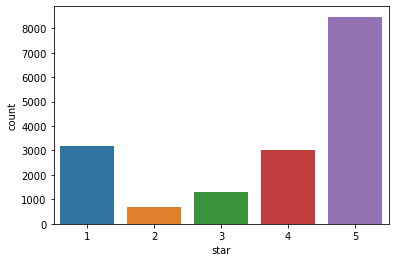

In [17]:
print(ds_train['star'].value_counts())
sns.countplot(ds_train['star'])
plt.show()

positive    12685
negative     3172
neutral       802
Name: sentiments, dtype: int64


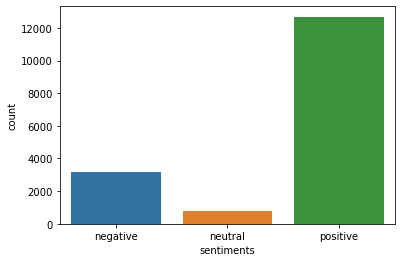

In [18]:
print(ds_train['sentiments'].value_counts())
sns.countplot(ds_train['sentiments'])
plt.show()

In [19]:
ds_train

,star,reviews,sentiments
0,3,your browser does not support html5 video the...,negative
1,1,laptop getting hang very much and very much s...,neutral
2,3,it looks the screen size is small its not loo...,positive
3,3,how to install a new ssd the ssd does not sho...,negative
4,1,hithis is a true feedback requesting you to n...,negative
...,...,...,...
16654,1,display problem,negative
16655,4,ok in this range for cctv monitoring,positive
16656,1,monitor screen not working,neutral
16657,1,glass has not fixed to the edges,neutral


# Observations
1. post seeing the results of sentiment analysis we can clearly devise that positive reviews are in abundance
2. neutral reviews or reviews with scores 2 and 3 are less, so model finalization must depend on accuracy and precision to predict these values/ ratings
3. if we see the sentiments that are predicted we can see some comments even if are haveing 1 rating are predicted/ classified as neutral

In [20]:
#defining lists of different classes so that loud words can be checked
list_1=[]
list_2=[]
list_3=[]
list_4=[]
list_5=[]
for ind in ds_train.index:
    if ds_train['star'][ind]==1:
        list_1.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==2:
        list_2.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==3:
        list_3.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==4:
        list_4.append(ds_train['reviews'][ind])
    elif ds_train['star'][ind]==5:
        list_5.append(ds_train['reviews'][ind])

In [21]:
len(list_1)+len(list_2)+len(list_3)+len(list_4)+len(list_5)

16659

In [22]:
ds_train.isnull().sum()

star          0
reviews       0
sentiments    0
dtype: int64

In [23]:
#function to get wordclouds 
def word_count(list_sent):
    for review in list_sent:
        ctr=Counter(word_tokenize(review,'english'))
    word_cloud=WordCloud(width=600,height=300, background_color='white',max_words=50).generate(' '.join(list_sent))
    plt.figure(figsize=(10,8),facecolor='b')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #return word_cloud
    arr=word_cloud.to_svg()
    soup = BeautifulSoup(arr, 'html.parser')
    results = soup.find_all('text')
    words=[]
    for i in results:
        words.append(str(i.text))
    print(words)

In [24]:
from bs4 import BeautifulSoup

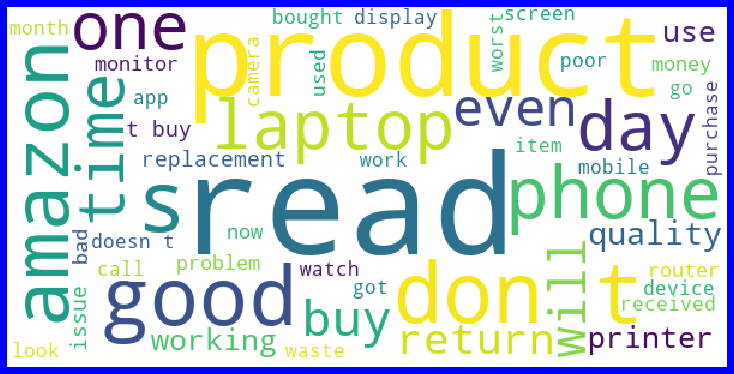

['read', 'product', 'don t', 's', 'good', 'amazon', 'phone', 'day', 'laptop', 'one', 'time', 'even', 'will', 'buy', 'return', 'quality', 'printer', 'use', 'working', 'replacement', 'issue', 't buy', 'bad', 'monitor', 'now', 'money', 'router', 'problem', 'got', 'watch', 'worst', 'bought', 'camera', 'device', 'work', 'doesn t', 'received', 'screen', 'month', 'mobile', 'item', 'look', 'call', 'used', 'go', 'display', 'app', 'poor', 'purchase', 'waste']


In [25]:
word_count(list_1)

we can see some words which suggest bad reviews
1. bad
2. issue
3. problem
4. waste
5. worst
6. replacement
7. don't
8. don't buy
9. doesn't
10. poor

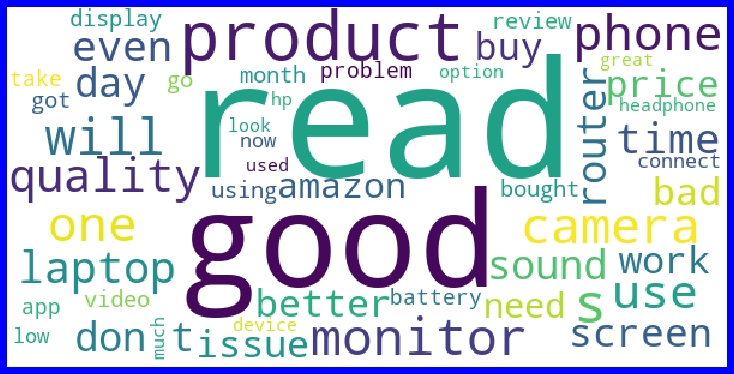

['read', 'good', 'product', 's', 'monitor', 'will', 'camera', 'one', 'phone', 'use', 'quality', 'laptop', 'time', 'even', 'don t', 'router', 'day', 'sound', 'screen', 'issue', 'bad', 'better', 'work', 'buy', 'price', 'amazon', 'need', 'display', 'video', 'using', 'got', 'review', 'go', 'month', 'bought', 'problem', 'battery', 'app', 'take', 'connect', 'low', 'now', 'headphone', 'used', 'option', 'great', 'device', 'hp', 'look', 'much']


In [26]:
word_count(list_2)

similar words as list 1 can be seen suggesting rating 2 also represents bad reviews

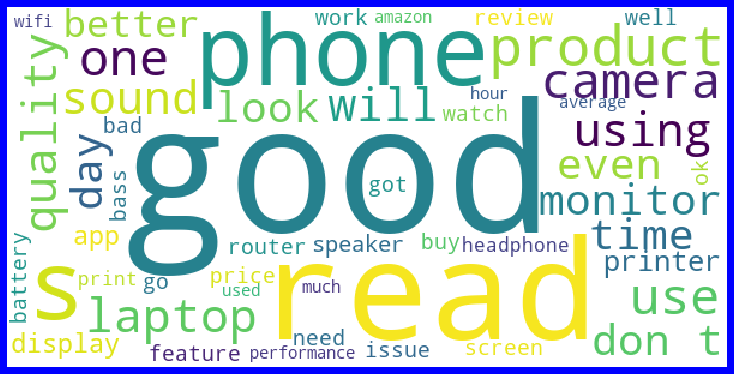

['good', 'read', 'phone', 's', 'product', 'use', 'one', 'camera', 'quality', 'laptop', 'using', 'will', 'sound', 'even', 'monitor', 'don t', 'time', 'look', 'day', 'better', 'printer', 'display', 'app', 'speaker', 'work', 'price', 'buy', 'issue', 'bad', 'go', 'bass', 'screen', 'router', 'watch', 'review', 'well', 'need', 'feature', 'battery', 'ok', 'got', 'headphone', 'print', 'performance', 'average', 'hour', 'amazon', 'much', 'wifi', 'used']


In [27]:
word_count(list_3)

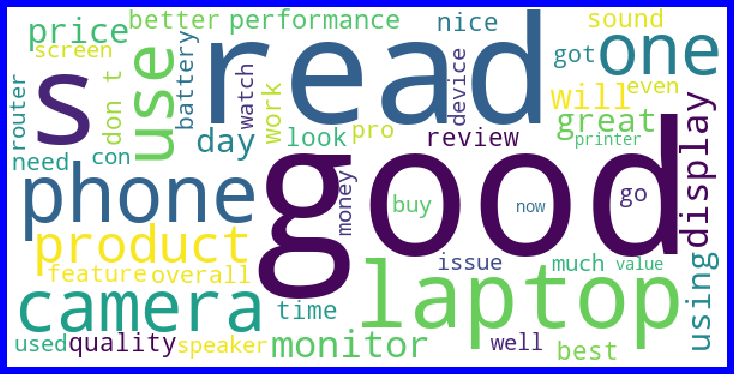

['good', 'read', 's', 'laptop', 'phone', 'camera', 'one', 'use', 'product', 'monitor', 'display', 'will', 'price', 'great', 'day', 'using', 'performance', 'quality', 'work', 'nice', 'best', 'look', 'review', 'better', 'sound', 'time', 'don t', 'feature', 'got', 'battery', 'pro', 'go', 'need', 'overall', 'speaker', 'screen', 'issue', 'buy', 'well', 'router', 'watch', 'device', 'used', 'even', 'much', 'con', 'money', 'printer', 'now', 'value']


In [28]:
word_count(list_4)

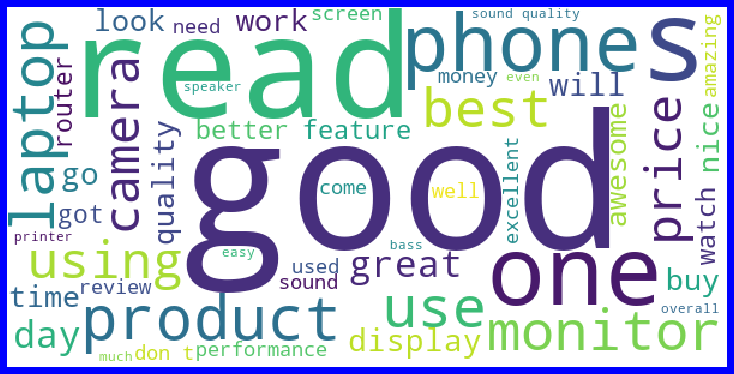

['good', 'read', 's', 'one', 'phone', 'product', 'laptop', 'use', 'monitor', 'best', 'using', 'price', 'camera', 'great', 'day', 'display', 'go', 'will', 'nice', 'work', 'quality', 'look', 'time', 'buy', 'awesome', 'feature', 'better', 'watch', 'router', 'got', 'performance', 'excellent', 'don t', 'money', 'need', 'screen', 'well', 'amazing', 'used', 'review', 'sound', 'come', 'sound quality', 'printer', 'overall', 'bass', 'speaker', 'much', 'easy', 'even']


In [29]:
word_count(list_5)

Looking at the words we get in wordclouds of list4(rating4) and list5(rating 5) we can clearly see some positive words as follows
1. good
2. best
3. great
4. nice
5. awesome
6. better
7. excellent
8. amazing

In [30]:
ds_train

,star,reviews,sentiments
0,3,your browser does not support html5 video the...,negative
1,1,laptop getting hang very much and very much s...,neutral
2,3,it looks the screen size is small its not loo...,positive
3,3,how to install a new ssd the ssd does not sho...,negative
4,1,hithis is a true feedback requesting you to n...,negative
...,...,...,...
16654,1,display problem,negative
16655,4,ok in this range for cctv monitoring,positive
16656,1,monitor screen not working,neutral
16657,1,glass has not fixed to the edges,neutral


# the part of notebook below is model building and prediction
the phases in this part are
1. creating vectors of words
2. dividing data
3. predicting for test data

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
tf_vec=TfidfVectorizer()

In [33]:
features=tf_vec.fit_transform(ds_train['reviews'])

In [34]:
features.shape

(16659, 21643)

In [35]:
x=features
y=ds_train['star']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred_dtc))

0.7126050420168067


In [37]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           1       0.72      0.74      0.73       794
           2       0.49      0.38      0.43       187
           3       0.48      0.47      0.47       322
           4       0.59      0.51      0.55       760
           5       0.80      0.84      0.82      2102

    accuracy                           0.71      4165
   macro avg       0.61      0.59      0.60      4165
weighted avg       0.70      0.71      0.71      4165



In [38]:
import seaborn as sns

In [39]:
print(confusion_matrix(y_test,y_pred_dtc))

[[ 587   30   50   36   91]
 [  53   71   14   18   31]
 [  54   12  151   34   71]
 [  48   12   47  390  263]
 [  73   21   52  187 1769]]


Text(0.5, 0.98, 'Comparision of DTC results')

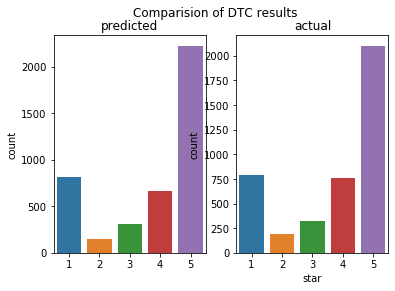

In [40]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_dtc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')
plt.suptitle('Comparision of DTC results')

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred_rfc))

0.7668667466986795


In [42]:
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.82      0.83      0.82       794
           2       0.95      0.33      0.49       187
           3       0.96      0.40      0.56       322
           4       0.92      0.38      0.53       760
           5       0.72      0.98      0.83      2102

    accuracy                           0.77      4165
   macro avg       0.88      0.58      0.65      4165
weighted avg       0.81      0.77      0.74      4165

[[ 657    2    0    1  134]
 [  67   62    1    1   56]
 [  49    0  128    4  141]
 [  13    0    1  286  460]
 [  18    1    3   19 2061]]


Text(0.5, 0.98, 'Comparision of RFC results')

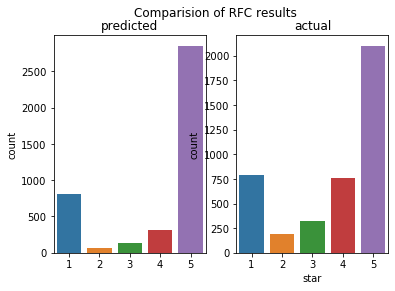

In [43]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_rfc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')

plt.suptitle('Comparision of RFC results')

In [44]:
from sklearn import svm
svc=svm.SVC()
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

In [45]:
print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

0.7668667466986795
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       794
           2       0.95      0.22      0.36       187
           3       0.81      0.36      0.50       322
           4       0.80      0.39      0.52       760
           5       0.75      0.97      0.85      2102

    accuracy                           0.77      4165
   macro avg       0.82      0.57      0.61      4165
weighted avg       0.78      0.77      0.74      4165

[[ 706    2    8   13   65]
 [  87   41    5    9   45]
 [  66    0  116   21  119]
 [  21    0    9  296  434]
 [  30    0    5   32 2035]]


Text(0.5, 0.98, 'Comparision of SVC results')

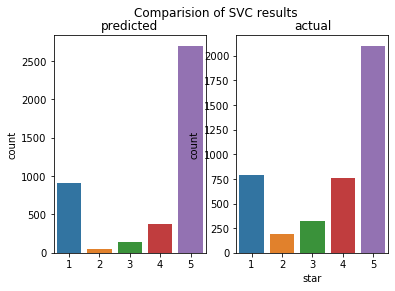

In [46]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_svc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')

plt.suptitle('Comparision of SVC results')

# observations from scores
1. SVC performs best on the reviews data
2. SVC and RFC have better abilities to predict less abundant values.
3. considering higher accuracy and minor differences in preiction capabilities SVC can be finalized.
4. hyper parameter tuning does not result into good results considering text data 

# testing a DL model 

In [49]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [50]:
train_size = int(len(ds_train) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(ds_train) - train_size))

Train size: 11661
Test size: 4998


In [51]:
train_reviews = ds_train['reviews'][:train_size]
train_stars = ds_train['star'][:train_size]

test_reviews = ds_train['reviews'][train_size:]
test_stars = ds_train['star'][train_size:]

In [52]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [53]:
tokenize.fit_on_texts(train_reviews) # only fit on train
x_train = tokenize.texts_to_matrix(train_reviews)
x_test = tokenize.texts_to_matrix(test_reviews)

In [54]:
encoder = LabelEncoder()
encoder.fit(train_stars)
y_train = encoder.transform(train_stars)
y_test = encoder.transform(test_stars)

In [55]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [56]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (11661, 1000)
x_test shape: (4998, 1000)
y_train shape: (11661, 5)
y_test shape: (4998, 5)


In [57]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)


Train on 10494 samples, validate on 1167 samples
Epoch 1/5
10494/10494 [==============================] - 6s 617us/step - loss: 1.0027 - accuracy: 0.6366 - val_loss: 0.9027 - val_accuracy: 0.6564
Epoch 2/5
10494/10494 [==============================] - 6s 550us/step - loss: 0.7087 - accuracy: 0.7463 - val_loss: 0.8881 - val_accuracy: 0.6392
Epoch 3/5
10494/10494 [==============================] - 5s 521us/step - loss: 0.5726 - accuracy: 0.8025 - val_loss: 0.8983 - val_accuracy: 0.6512
Epoch 4/5
10494/10494 [==============================] - 6s 529us/step - loss: 0.4535 - accuracy: 0.8479 - val_loss: 0.9518 - val_accuracy: 0.6315
Epoch 5/5
10494/10494 [==============================] - 6s 574us/step - loss: 0.3637 - accuracy: 0.8824 - val_loss: 0.9533 - val_accuracy: 0.6392


# results
1. the DL model gives a validation accuracy of 0.63 which is lower than the accuracy observed in ML models
2. further it s observed that the model does not perform well on test data suggesting underfitting

In [59]:
score = model.evaluate(x_test, y_test,
                       batch_size=32, verbose=1)
print('Test accuracy:', score[1])

4998/4998 [==============================] - 0s 97us/step
Test accuracy: 0.6410564184188843


In [60]:
#saving the model
import joblib
joblib.dump(svc,'ratingsPred.pkl')

['ratingsPred.pkl']